# Character Impact Project (Part 3) - Visualizing Data from the IMDb Dataset
## Exploratory Data Analysis
### Alden Chico

---

## Premise

### <center>"I KNEW EXACTLY WHAT TO DO. BUT IN A MUCH MORE REAL SENSE, I HAD NO IDEA WHAT TO DO."</center>
<figure>   
    <img src="http://mukulj.com/images/office_stress.jpg" alt="Michael Scott\'s Wisdom Goes Unmatched"
         class="center"style="width:348px;height:288px;">
    <figcaption><center>Michael Scott (Season 5, Ep. 14 - "Stress Relief")</center></figcaption>
</figure>

***Smoke. Searing hot door handles. A cat trapped in the roof. A heart attack.*** The greatest opening sequence in <i>The Office</i>'s entire running history (end of story, no debate) comes from Season 5, Episode 14 - "Stress Relief". The opening scene was so funny, in fact, that it won an Emmy award for Outstanding Directing for a Comedy Series (1). It seems like with comedy this good, how can anyone possibly come up with these ideas? Where do you start? Well, as Michael Scott put it simply in the quote above, you have to know you're doing in the moment, but in reality, have no idea what's going on and let what you're doing guide you to what's going to happen next (at least that's how I interpreted it).

This mindset carries on to making data related decisions. As a data scientist, you gather data from a database, clean it up a bit and organize it to a more digestible form, but after you're done with all that, you need to understand what the data is telling you. If you don't know what the data is telling you, and more importantly, don't remember what the data means, then processing your data isn't a very useful exercise. The best way to start working with data from a dataset is to turn the information into a series of visualizations. Visualizations, when done properly, should show your audience ideas related to the data that they can understand just by looking at a picture.

For this step of the process, we are going to organize the IMDb data for <i>The Office</i> that we pulled in the previous step to a more digestible form organized by each episode. From there, we will create a DataFrame from the cast members of <i>The Office</i> and populate it with information related to their characters on the show. Lastly, we will create visualizations to convey the information from the DataFrame and save the visualizations as an image file. These visualizations are going to help us understand some obstacles we might face when working with facial recognition and measuring the amount of time each character spends on each episode of the show. Similarities between characters such as their ethnicity, age, and gender might affect the accuracy of our model, so we have to be wary about what we're going to be working with in future steps of the process. That's a lot to do for this blog post, so let's get started!

---

## Step 1: Setup

The first step here is setting up our project using information that we gathered from cleaning IMDb's dataset. To review what we did, let's import all the libraries that we'll need and take a look at what the CSV file looks like.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from collections import defaultdict

In [2]:
the_office_df = pd.read_csv("output/the_office.csv")
the_office_df

,Unnamed: 0,tconst_series,tconst_episode,primaryTitle_series,primaryTitle_episode,seasonNumber,episodeNumber,averageRating,cast,characters
0,0,tt0386676,tt0664521,The Office,Pilot,1,1,7.6,"['Steve Carell', 'Rainn Wilson', 'John Krasins...","['Michael Scott', 'Dwight Schrute', 'Jim Halpe..."
1,1,tt0386676,tt0664514,The Office,Diversity Day,1,2,8.3,"['Steve Carell', 'Rainn Wilson', 'John Krasins...","['Michael Scott', 'Dwight Schrute', 'Jim Halpe..."
2,2,tt0386676,tt0664517,The Office,Health Care,1,3,7.9,"['Steve Carell', 'Rainn Wilson', 'John Krasins...","['Michael Scott', 'Dwight Schrute', 'Jim Halpe..."
3,3,tt0386676,tt0664523,The Office,The Alliance,1,4,8.1,"['Steve Carell', 'Rainn Wilson', 'John Krasins...","['Michael Scott', 'Dwight Schrute', 'Jim Halpe..."
4,4,tt0386676,tt0664510,The Office,Basketball,1,5,8.4,"['Steve Carell', 'Rainn Wilson', 'John Krasins...","['Michael Scott', 'Dwight Schrute', 'Jim Halpe..."
5,5,tt0386676,tt0664518,The Office,Hot Girl,1,6,7.8,"['Steve Carell', 'Rainn Wilson', 'John Krasins...","['Michael Scott', 'Dwight Schrute', 'Jim Halpe..."


After we cleaned the IMDb dataset, we were left with ```tconst```, series name, episode, average rating, cast, and character information. We don't need the ```tconst``` and series name columns since they were only useful in identifying <i>The Office</i> information when we were cleaning the IMDb data. Also, let's look at a cast entry from the dataset:

In [3]:
print(the_office_df.loc[0, 'cast'])
print(type(the_office_df.loc[0, 'cast']))

['Steve Carell', 'Rainn Wilson', 'John Krasinski', 'Jenna Fischer', 'B.J. Novak', 'Melora Hardin', 'David Denman', 'Leslie David Baker', 'Brian Baumgartner', 'Angela Kinsey', 'Henriette Mantel', 'Mike McCaul', 'Oscar Nuñez', 'Phyllis Smith']
<class 'str'>


We can see here that an entry in the cast column is of type ```str```. This means that instead of reading out the cast and character member entries as a proper list, every entry is a conglomerate string containing every actor's and actress's names. We need to parse through the cast and character strings to pick out the individuals from the string and reorganize the DataFrame to be indexed more naturally by the episodes in the show. You can see how we accomplish this below. 

In [4]:
# Prepare a working DataFrame that we will use for the project called working_df
working_df = pd.DataFrame()
index = pd.MultiIndex.from_product([list(the_office_df.primaryTitle_episode), ['Cast','Characters']],
                                  names=['Episode',''])
for idx, row in the_office_df.iterrows():
    
    # Turn cast members string from an episode into a list of individual cast members with string parsing
    cast_list = row.cast[1:-1]
    cast_list = cast_list.replace('\'', '').split(', ')
    
    # Turn characters string from an episode into a list of individual characters with string parsing
    character_list = row.characters[1:-1]
    character_list = character_list.replace('\'', '').split(', ')
    
    # Add the cast/character pairs to the working DataFrame
    working_df[row.primaryTitle_episode + ' Cast'] = cast_list
    working_df[row.primaryTitle_episode + ' Character'] = character_list
    
# Transpose the working_df so every row is associated to an episode of the show
working_df = working_df.T
working_df = pd.DataFrame(working_df.values, index=index, columns=range(1,15))

# Fix weirdly formatted names from the DataFrame
working_df.loc[('Basketball', 'Cast'), 8] = 'Patrice O\'Neal'
working_df.loc[('The Alliance', 'Characters'), 13] = 'Oscar Martinez'

working_df

1               2               3   \
Episode                                                                   
Pilot         Cast         Steve Carell    Rainn Wilson  John Krasinski   
              Characters  Michael Scott  Dwight Schrute     Jim Halpert   
Diversity Day Cast         Steve Carell    Rainn Wilson  John Krasinski   
              Characters  Michael Scott  Dwight Schrute     Jim Halpert   
Health Care   Cast         Steve Carell    Rainn Wilson  John Krasinski   
              Characters  Michael Scott  Dwight Schrute     Jim Halpert   
The Alliance  Cast         Steve Carell    Rainn Wilson  John Krasinski   
              Characters  Michael Scott  Dwight Schrute     Jim Halpert   
Basketball    Cast         Steve Carell    Rainn Wilson  John Krasinski   
              Characters  Michael Scott  Dwight Schrute     Jim Halpert   
Hot Girl      Cast         Steve Carell    Rainn Wilson  John Krasinski   
              Characters  Michael Scott  Dwight Schrute     Jim Halpert   

                                     4            5                   6   \
Episode                                                                    
Pilot         Cast        Jenna Fischer   B.J. Novak       Melora Hardin   
              Characters     Pam Beesly  Ryan Howard  Jan Levinson-Gould   
Diversity Day Cast        Jenna Fischer   B.J. Novak       Larry Wilmore   
              Characters     Pam Beesly  Ryan Howard           Mr. Brown   
Health Care   Cast        Jenna Fischer   B.J. Novak       Melora Hardin   
              Characters     Pam Beesly  Ryan Howard  Jan Levinson-Gould   
The Alliance  Cast        Jenna Fischer   B.J. Novak        David Denman   
              Characters     Pam Beesly  Ryan Howard        Roy Anderson   
Basketball    Cast        Jenna Fischer   B.J. Novak        David Denman   
              Characters     Pam Beesly  Ryan Howard        Roy Anderson   
Hot Girl      Cast        Jenna Fischer   B.J. Novak           Amy Adams   
              Characters     Pam Beesly  Ryan Howard                Katy   

                                          7                   8   \
Episode                                                            
Pilot         Cast              David Denman  Leslie David Baker   
              Characters        Roy Anderson      Stanley Hudson   
Diversity Day Cast        Leslie David Baker   Brian Baumgartner   
              Characters      Stanley Hudson        Kevin Malone   
Health Care   Cast        Leslie David Baker   Brian Baumgartner   
              Characters      Stanley Hudson        Kevin Malone   
The Alliance  Cast            Craig Robinson  Leslie David Baker   
              Characters      Darryl Philbin      Stanley Hudson   
Basketball    Cast            Craig Robinson      Patrice O'Neal   
              Characters      Darryl Philbin               Lonny   
Hot Girl      Cast             Melora Hardin        David Denman   
              Characters  Jan Levinson-Gould        Roy Anderson   

                                          9                  10  \
Episode                                                           
Pilot         Cast         Brian Baumgartner      Angela Kinsey   
              Characters        Kevin Malone      Angela Martin   
Diversity Day Cast             Kate Flannery       Mindy Kaling   
              Characters     Meredith Palmer       Kelly Kapoor   
Health Care   Cast             Kate Flannery   Charlie Hartsock   
              Characters     Meredith Palmer       Travel Agent   
The Alliance  Cast         Brian Baumgartner      Kate Flannery   
              Characters        Kevin Malone    Meredith Palmer   
Basketball    Cast        Leslie David Baker  Brian Baumgartner   
              Characters      Stanley Hudson       Kevin Malone   
Hot Girl      Cast        Leslie David Baker  Brian Baumgartner   
              Characters      Stanley Hudson       Kevin Malone   

                             

---

## Step 2: Creating a DataFrame of Cast Members from <i> The Office </i>

Now that we organized our IMDb data by Season 1 episodes,  what we want to do now is organize the cast member information into its own separate DataFrame. ```cast_df``` will contain all the information for the individual cast members of the show which will be useful for training our facial recognition program moving forward.

We'll start by extracting the cast member names for each episode from ```working_df``` into a set called ```episode_cast_set```. This set is union joined to our master cast set called ```cast_set``` that contains all the cast names for the season. We're using sets for this step since sets automatically remove duplicate entries from the data structure. Once we collect all the unique names from the series, we can add ```cast_set``` to ```cast_df``` DataFrame under the ```Cast Member``` column.

In [5]:
# Find all the unique actors/actresses involved with the first season of The Office
cast_set = set()

for episode in working_df.index.get_level_values('Episode'):
    
    # Union unique cast members into a set
    episode_cast_set = set(working_df.loc[(episode,'Cast'),:])
    cast_set = cast_set.union(episode_cast_set)
    
# Create a DataFrame involving only the cast members of The Office
cast_df = pd.DataFrame()
cast_df['Cast Member'] = pd.Series(list(cast_set))

cast_df

,Cast Member
0,Steve Carell
1,Rainn Wilson
2,Leslie David Baker
3,Charlie Hartsock
4,Jenna Fischer
5,Brian Baumgartner
6,B.J. Novak
7,Angela Kinsey
8,Oscar Nuñez
9,Mike McCaul


---

## Step 3: Adding Character Information to the DataFrame

With the cast member information stored in our DataFrame, the next thing we want to do is add what characters each cast member portrayed in the show. To do so, we will go through each episode in ```the_office_df``` and gather the episode's cast member list. We then iterate through the cast member list and temporarily store each cast member's name and the name of the character they portrayed on each iteration. We use the cast member's name as an index locator in ```working_df``` to add their character's name to our DataFrame. Here are the results:

In [6]:
# Create a character column
cast_df['Character'] = ''

for episode in working_df.index.get_level_values('Episode'):
    
    # Extract the cast member list from each episode
    cast_members = working_df.loc[(episode, 'Cast'), :]
    
    for idx, val in enumerate(cast_members):
        
        # Go through each cast member and character in a single episode
        cast_member = working_df.loc[(episode, 'Cast'), idx + 1]
        character = working_df.loc[(episode, 'Characters'), idx + 1]
        
        # Associate each character to their respective cast member
        cast_df.loc[cast_df['Cast Member'] == cast_member, 'Character'] = character

# Print the results
cast_df.head()

,Cast Member,Character
0,Steve Carell,Michael Scott
1,Rainn Wilson,Dwight Schrute
2,Leslie David Baker,Stanley Hudson
3,Charlie Hartsock,Travel Agent
4,Jenna Fischer,Pam Beesly


---

## Step 4: Adding Gender, Ethnicity, and Age Information

Sometimes when gathering data, it requires the coder to get down and dirty and perform some manual entry onto the DataFrame since no website has the information neatly stored in their API. This is what we have to do to add gender, ethnicity, and age information to ```cast_df```. 

For gender information, we fill a gender column entirely with the letter 'M' since most of the characters on the show are male. We can then generate a list of female cast members in a list called ```female_list``` and use the ```cast_df['Cast Member'].isin(female_list)``` function as a row locator to find all the rows that contain names of cast members contained in ```female_list```. Doing this allows us to easily change the 'M' to 'F' for female cast members in the show.

We perform a similar process for ethnicity information. Since most of the cast members are white, we instantiate the ethnicity column with 'White'. Then through the same process as gender, we generate a list of characters and their respective ethnicities and add the minority ethnicity information to the DataFrame.

Age information is different. Since age is a continuous variable and there's no way to automatically enter age information easily for every character in the show, we have to go on [Dunderpedia: The Office Wiki](https://theoffice.fandom.com/wiki/Main_Page) (2) to find birth year information for characters in the show. If the information isn't available on the wiki, we do a simple Google search of the cast member's name and assume their actual age for the show.

In [7]:
# Create a gender column 
cast_df['Gender'] = pd.Series(['M'] * len(cast_set))
female_list = ['Angela Kinsey', 'Phyllis Smith', 'Kate Flannery', 'Amy Adams', 'Mindy Kaling', 'Henriette Mantel',
              'Jenna Fischer', 'Melora Hardin']
cast_df.loc[cast_df['Cast Member'].isin(female_list), 'Gender'] = 'F'

In [8]:
# Create an ethnicity column
cast_df['Ethnicity'] = pd.Series(['White'] * len(cast_set))

# Create lists of cast members and their ethnicities other than white
black_ethnicity_list = ['Larry Wilmore', 'Leslie David Baker', 'Patrice O\'Neal', 'Craig Robinson']
latino_ethnicity_list = ['Oscar Nuñez']
asian_ethnicity_list = ['Mindy Kaling']

# Change DataFrame to reflect cast member ethnicity
cast_df.loc[cast_df['Cast Member'].isin(black_ethnicity_list), 'Ethnicity'] = 'Black'
cast_df.loc[cast_df['Cast Member'].isin(latino_ethnicity_list), 'Ethnicity'] = 'Latino'
cast_df.loc[cast_df['Cast Member'].isin(asian_ethnicity_list), 'Ethnicity'] = 'Asian'


In [9]:
# Create an age column
cast_df['Age'] = 30
# Use a dictionary to associate cast members with their character's age
d = {
    'Angela Kinsey': 31,
    'B.J. Novak': 26,
    'Brian Baumgartner': 37,
    'Jenna Fischer': 27,
    'John Kransinski': 27,
    'Leslie David Baker' : 47,
    'Oscar Nuñez' : 33,
    'Rainn Wilson' : 33,
    'Steve Carell' : 43,
    'Kate Flannery' : 46,
    'David Denman' : 32,
    'Paul Lieberstein' : 38,
    'Melora Hardin' : 36,
    'Phyllis Smith' : 41,
    'Craig Robinson' : 34,
    'Mindy Kaling' : 25,
    'Amy Adams' : 31,
    'Charlie Hartsock' : 43,
    'Henriette Mantel' : 47,
    'Larry Wilmore' : 44,
    'Matt DeCaro' : 45,
    'Mike McCaul' : 37,
    'Patrice O\'Neal' : 35
}

for cast_member, age in d.items():
    cast_df.loc[cast_df['Cast Member'] == cast_member, 'Age'] = age

In [10]:
# Print the results
cast_df.head()

,Cast Member,Character,Gender,Ethnicity,Age
0,Steve Carell,Michael Scott,M,White,43
1,Rainn Wilson,Dwight Schrute,M,White,33
2,Leslie David Baker,Stanley Hudson,M,Black,47
3,Charlie Hartsock,Travel Agent,M,White,43
4,Jenna Fischer,Pam Beesly,F,White,27


---

## Step 5: Adding Character Appearance Information

The last piece of information we'll glean from ```the_office_df``` is how many times each character appeared on the show. We can do this using a defaultdict. Defaultdicts are data structures that act similarly to Python dictionaries except for the fact that the values are given a default data type and baseline values if the key didn't previously exist in the defaultdict. 

For this example, we start by creating a defaultdict ```d```. We cycle through each episode in ```the_office_df``` and create a cast member list for the episode. Using the cast member list, we add a key to ```d``` with the cast member's name as a key and increment the cast member's value. One increment is one character appearance. After we populate our defaultdict, we iterate through the defaultdict and use the cast member's names as the index locator for ```working_df```. The value from the defaultdict is stored in our ```working_df``` DataFrame under the ```Number of Episodes``` column. Since we're now done constructing our DataFrame, we will reorganize the DataFrame by sorting the DataFrames values on the ```Number of Episodes``` and ```characters``` columns and save the DataFrame as ```cast_df.csv``` in our output folder.

In [11]:
# Create a number of episode appearances column
cast_df['Number of Episodes'] = 0
d = defaultdict(float)

for episode in working_df.index.get_level_values('Episode'):
    # Find the cast list for each individual episode
    episode_set = working_df.loc[(episode,'Cast'), :]
    # Add to the cast list
    for cast_member in episode_set:
        d[cast_member] += 0.5

# Add the number of episode frequency count for each cast member in the show
for k,v in d.items():
    cast_df.loc[cast_df['Cast Member'] == k, 'Number of Episodes'] = int(v)

In [12]:
# Organize the DataFrame by the number of episode appearances and the cast members names
cast_df = cast_df.sort_values(['Number of Episodes', 'Cast Member'], ascending=[False, True]).reset_index(drop=True)
cast_df.to_csv('output/cast_df.csv')
cast_df

,Cast Member,Character,Gender,Ethnicity,Age,Number of Episodes
0,Angela Kinsey,Angela Martin,F,White,31,6
1,B.J. Novak,Ryan Howard,M,White,26,6
2,Brian Baumgartner,Kevin Malone,M,White,37,6
3,Jenna Fischer,Pam Beesly,F,White,27,6
4,John Krasinski,Jim Halpert,M,White,30,6
5,Leslie David Baker,Stanley Hudson,M,Black,47,6
6,Oscar Nuñez,Oscar Martinez,M,Latino,33,6
7,Rainn Wilson,Dwight Schrute,M,White,33,6
8,Steve Carell,Michael Scott,M,White,43,6
9,Kate Flannery,Meredith Palmer,F,White,46,5


---

## Step 6: Using a Line Plot to Represent Episode Ratings

Now that we're done working on the cast DataFrame we can start  making visualizations using this data. The first visualization we will create is one for the show's television ratings. We can do this using a line plot. A line plot is appropriate here since the line between points represents continuity between episodes. Also, by marking the show's average performance with a horizontal line, we can visually determine which episodes performed above and below average. Here are the results of constructing a line plot using ```matplotlib```.

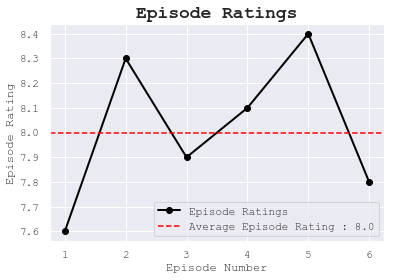

In [13]:
sns.set()
plt.rcParams['font.sans-serif'] = 'Courier New'

def rating_plot():
    # Find the average episode rating for the first season of The Office
    average_season_rating = round(np.mean(the_office_df.loc[:, 'averageRating']), 1)

    # Plot the season rating information
    _ = plt.plot(the_office_df.loc[:, 'episodeNumber'], the_office_df.loc[:, 'averageRating'], 
                 marker='o', color='black', linestyle='solid', linewidth='2', label='Episode Ratings')
    _ = plt.axhline(average_season_rating, color='red', linestyle='dashed', label=f'Average Episode Rating : {average_season_rating}')

    # Label the season rating figure
    _ = plt.title('Episode Ratings', fontsize=18, fontweight='bold')
    _ = plt.xlabel('Episode Number')
    _ = plt.ylabel('Episode Rating')
    _ = plt.legend(loc='lower right')

rating_plot()
plt.show()

---

## Step 7: Using Donut Plots to Represent Character Diversity 

Donut plots are useful for conveying general demographic information to the viewer. We are interested in seeing how much of the total that majority demographics (white/male) take. These two visualizations are shown below. Since white males take over a majority of the cast, we should be wary of confusion among these main demographics when running our facial recognition software.

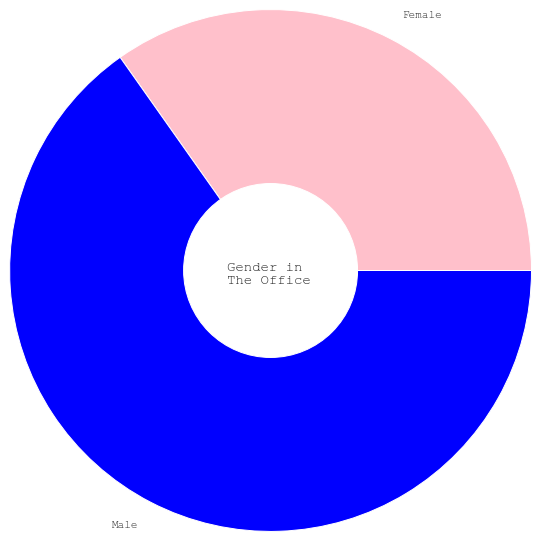

In [14]:
# Perform frequency count on gender information from the DataFrame
gender_count = cast_df.groupby('Gender')['Gender'].count()
def gender_plot():
    # Create a basic pie plot for the gender information
    _ = plt.pie(gender_count, colors=['pink', 'blue'], labels=['Female', 'Male'], radius=3)

    # Add a white circle in the center for donut plot
    circle = plt.Circle( (0,0), 1, color='white')
    p = plt.gcf()
    p.gca().add_artist(circle)

# Run the function and display the results
gender_plot()
_ = plt.annotate('Gender in \nThe Office', xy=(-0.5,-0.15), fontsize=14)
plt.show()

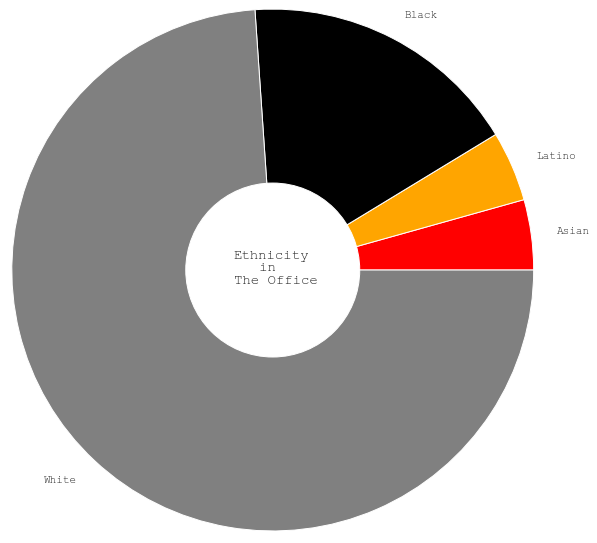

In [15]:
# Perform frequency count on ethnic information from the DataFrame
ethnicity_count = cast_df.groupby('Ethnicity')['Ethnicity'].count().sort_values()
def diversity_plot():
    # Create a basic pie plot for the ethnicity information
    _ = plt.pie(ethnicity_count, colors=['Red', 'Orange', 'Black', 'Gray'], 
                labels=['Asian', 'Latino', 'Black', 'White'], radius=3)

    # Add a circle at the center
    circle = plt.Circle( (0,0), radius=1, color='white')
    p = plt.gcf()
    p.gca().add_artist(circle)
    
# Run the function and display the results
_ = diversity_plot()
_ = plt.annotate('Ethnicity\n   in \nThe Office', xy=(-0.45,-0.15), fontsize=14) 
plt.show()

---

## Step 8: Using a Histogram to Represent Age Demographics

Histograms are used to bin data from a single variable into groups and show the distribution of the data. We are interested in binning the age of characters from the show by 5 years since 5 years is a nice round number to segment the characters by. It's arbitrary to bin them by 5 year increments, but having round numbers for histograms along the x-axis is aesthetically pleasing. The age of characters in the show might affect the performance of the facial recognition program.

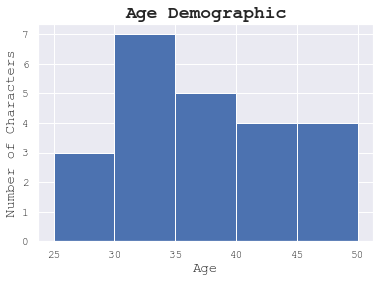

In [16]:
def age_plot():
    # Create a histogram binned by every five years of age
    bins = [x for x in range(25, 55, 5)]
    _ = plt.hist(cast_df['Age'], bins = bins)
    
    # Label the figure
    _ = plt.title('Age Demographic', fontsize=18, fontweight='bold')
    _ = plt.xlabel('Age', fontsize=14)
    _ = plt.ylabel('Number of Characters', fontsize=14)

# Run the function and display the results
_ = age_plot()
plt.show()

---

## Step 9: Using a  Discrete Line Plot to Represent Character Appearance Information

Lastly, for the character appearance information, we can use a chart similar to a histogram called a discrete line plot. Since the episode information takes over a discrete range of values from one to six, a histogram isn't appropriate for this information since the histogram implies values over the range between bin values. However, the length of the lines associated with histograms are a good visual representation to compare how many characters appeared in x number of episodes.

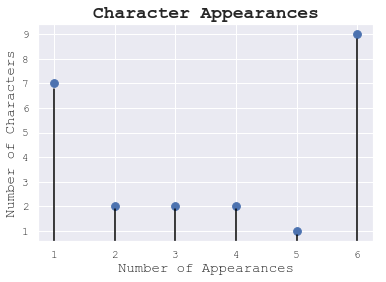

In [17]:
# Perform frequency count on character appearance information
character_appearances = cast_df.groupby('Number of Episodes')['Cast Member'].count()
def appearance_plot():
    # Generate a scatter plot comparing no. of appearances to no. of characters with that appearance frequency
    _ = plt.scatter(character_appearances.index.values, character_appearances, s=60)

    # Plot vertical lines joining x axis to the scatter plot points
    _ = plt.axvline(1, ymax=.7, color='black')
    _ = plt.axvline(2, ymax=.15, color='black')
    _ = plt.axvline(3, ymax=.15, color='black')
    _ = plt.axvline(4, ymax=.15, color='black')
    _ = plt.axvline(5, ymax=.03, color='black')
    _ = plt.axvline(6, ymax=.93, color='black')
    
    # Label the figure
    _ = plt.title('Character Appearances', fontsize=18, fontweight='bold')
    _ = plt.xlabel('Number of Appearances', fontsize=14)
    _ = plt.ylabel('Number of Characters', fontsize=14)

# Run the function and display the results
appearance_plot()
plt.show()

---

## Step 10: Tying Everything Together into a Single Visualization

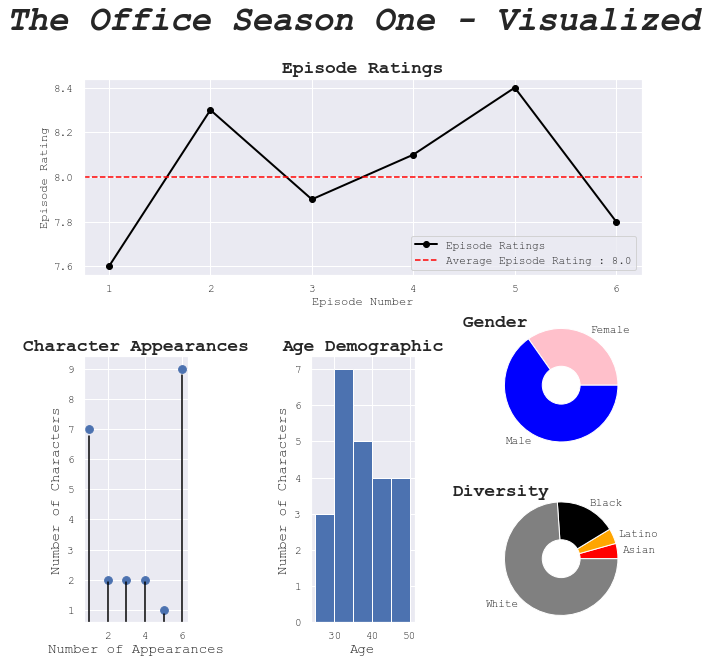

In [18]:
# Create the main grid to organize the visualization
fig = plt.figure(figsize=(10,10))
grid = plt.GridSpec(8, 10, figure=fig)
fig.suptitle("The Office Season One - Visualized", fontsize=34, fontweight='bold',style='italic')

# Plot the season rating information
ax1 = fig.add_subplot(grid[0:3, :])
_ = rating_plot()

# Plot the gender donut chart
ax2 = fig.add_subplot(grid[4:5, 8])
gender_plot()


# Plot the title for the gender donut chart
ax3 = fig.add_subplot(grid[3:4, 8])
_ = plt.text(-1.8, 0.31, ' Gender', size=18, fontweight='bold')
_ = plt.axis('off')

# Plot the diversity donut chart
ax4 = fig.add_subplot(grid[6:8, 8])
diversity_plot()

# Plot the title for the diversity donut chart
ax5 = fig.add_subplot(grid[6:8, 9])
_ = plt.text(-3, 1, 'Diversity', size=18, fontweight='bold')
_ = plt.axis('off')

# Plot the character appearance plot
ax6 = fig.add_subplot(grid[4:, 0:2])
_ = appearance_plot()

# Plot the age demographics
ax7 = fig.add_subplot(grid[4:, 4:6])
_ = age_plot()

# Save and display the ultimate visualization
_ = plt.savefig(fname='output/the_office_eda.png')
plt.show()

From our visualization, we can make a few easy conclusions for the first season of <i>The Office</i>. Our first observation is that episodes 1, 3, and 6 were the lower performing episodes in the bunch. We can use these episodes as points of comparison against the higher performing episodes and analyze character screen times between the two. 

Our next observation is that a total of 9 characters show up in every episode of the show. We can use this fact as a baseline measurement to see if the same 9 characters are actually detected by our software for every episode. If nine characters don't appear in every episode of <i>The Office</i> by the time we finish running the software on each episode, then we need to look at what characters aren't showing up and why. 

Lastly, we notice that the age demographic is fairly spread out between characters that are 25 and 50 years of age. It will be interesting to note if age demographics are a potential source of confusion for our facial recognition algorithm. What will probably cause the most confusion for our software, however, will be the white and male majority populations in the show. More than 66% of the cast is male and 75% of the cast is white. Having such a homogenous cast may lower the accuracy of our facial recognition software and we may need to find ways to resolve this issue.

Anyways, this is just a quick visualization as to how we can interpret the basic cast member information from our show. Having this information in mind as we construct our facial recognition software is good to know as we're trying to debug the software and improve its accuracy. This visualization is saved as ```the_office_eda.png``` in our output folder for the project.

For the next step of our project, we will begin working with OpenCV to get basic character recognition software done on characters in <i>The Office</i>. Until next time!

---

#### Appendix
(1) https://www.emmys.com/shows/office

(2) https://theoffice.fandom.com/wiki/Main_Page